# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
import math
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression


# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')        

## Have a look at the general data:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/18/20  9/19/20  9/20/20  \
0        0        0        0        0  ...    38883    38919    39044   
1        0        0        0        0  ...    12073    12226    12385   
2        0        0        0        0  ...    49413    49623    49826   
3        0        0        0        0  ...     1564     1564     1564   
4        0        0        0        0  ...     3848     3901     3991   

   9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  9/26/20  9/27/20  
0    39074    39096    39145    39170    39186    39192    39227  
1    12535    12666    12787    12921    13045    13153    13259  
2    50023    50214    50400    50579    50754    50914    51067  
3     1681     1681     1753     1753     1836     1836     1836  
4     4117     4236     4363     4475     4590     4672     4718  

[5 rows x 254 columns]

In [5]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/18/20  9/19/20  9/20/20  \
0        0        0        0        0  ...     1437     1437     1441   
1        0        0        0        0  ...      353      358      362   
2        0        0        0        0  ...     1659     1665     1672   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...      147      147      152   

   9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  9/26/20  9/27/20  
0     1444     1445     1446     1451     1451     1453     1453  
1      364      367      370      370      373      375      377  
2     1679     1689     1698     1703     1707     1711     1714  
3       53       53       53       53       53       53       53  
4      154      155      159      162      167      171      174  

[5 rows x 254 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/18/20  9/19/20  9/20/20  \
0        0        0        0        0  ...    32576    32576    32576   
1        0        0        0        0  ...     6831     6888     6940   
2        0        0        0        0  ...    34818    34923    35047   
3        0        0        0        0  ...     1164     1164     1164   
4        0        0        0        0  ...     1443     1445     1445   

   9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  9/26/20  9/27/20  
0    32576    32576    32610    32619    32619    32635    32642  
1     6995     7042     7139     7239     7309     7397     7397  
2    35180    35307    35428    35544    35654    35756    35860  
3     1199     1199     1203     1203     1263     1263     1263  
4     1449     1462     1473     1503     1554     1639     1707  

[5 rows x 254 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

# Calculate the number of total[cases, deaths, recovered, active]
for col in confirmed.columns:
    total_cases.append(sum(confirmed[col]))
    total_deaths.append(sum(deaths[col]))
    total_recovered.append(sum(recoveries[col]))
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

# Calculate the mortarity rate and recovery rate
for i in range(len(total_cases)):
    mortality_rate.append(total_deaths[i]/total_cases[i])
    recovery_rate.append(total_recovered[i]/total_cases[i])

In [8]:
# The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])
print("The lastest mortality rate of total cases: ", mortality_rate[-1])
print("The lastest recovery rate of total cases: ", recovery_rate[-1])

Total confirmed cases:  32995554
Total death cases:  996695
Total recoveries cases:  22850774
Total active cases:  9148085
The lastest mortality rate of total cases:  0.030206948487665943
The lastest recovery rate of total cases:  0.692541001130031


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

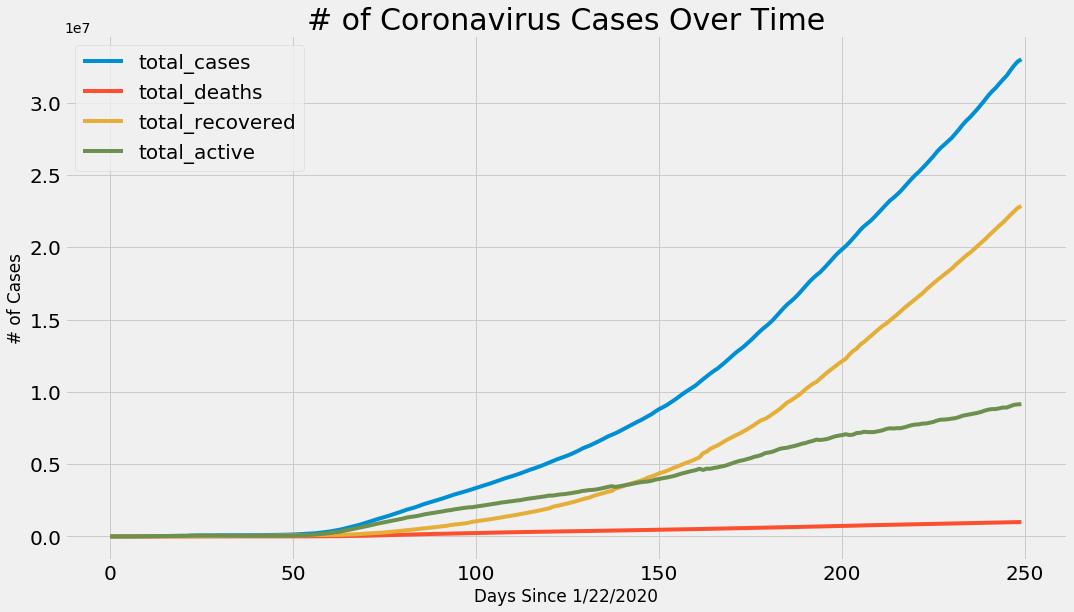

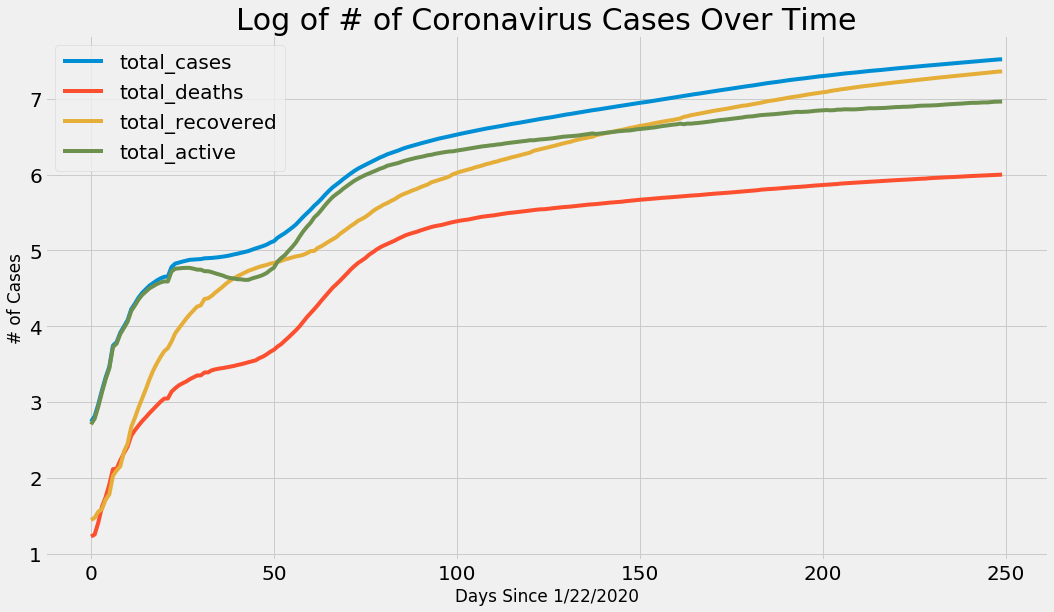

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_cases))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.plot(adjusted_dates, np.log10(total_active))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

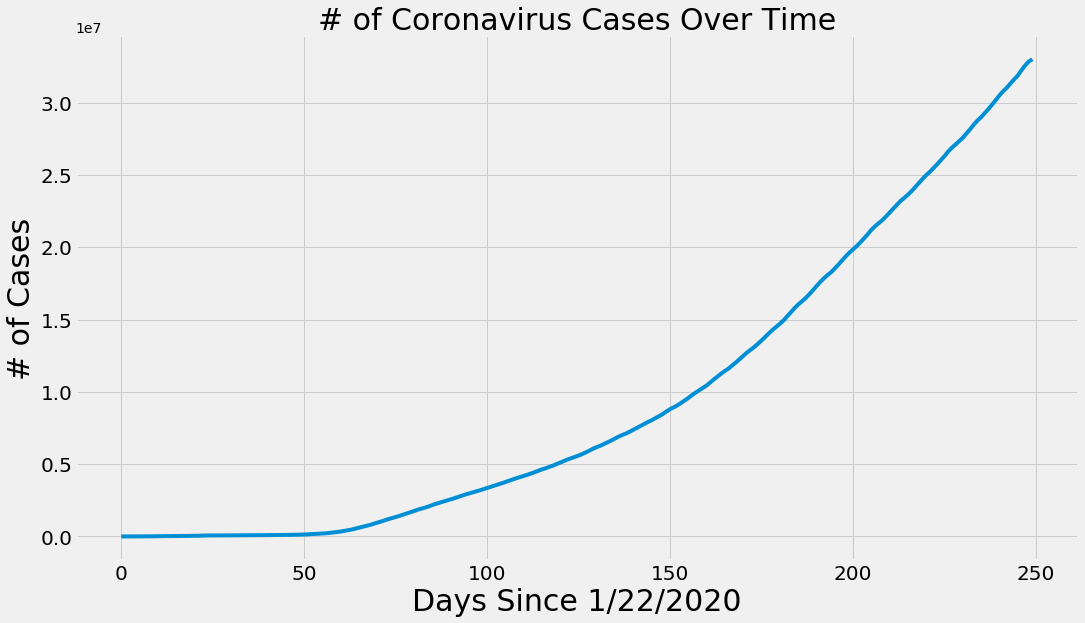

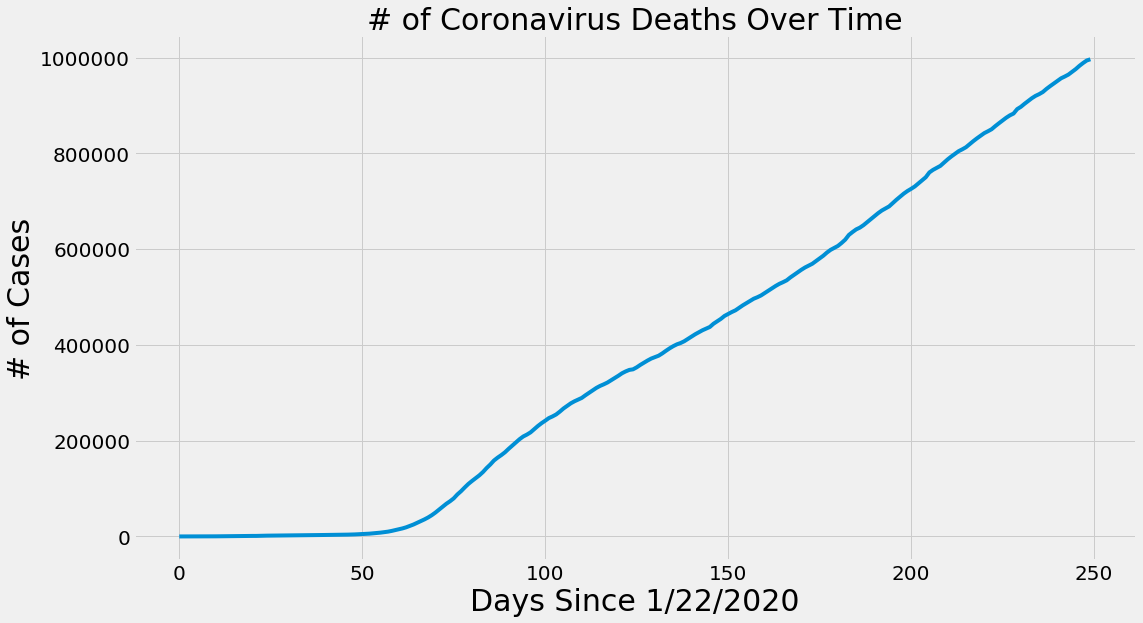

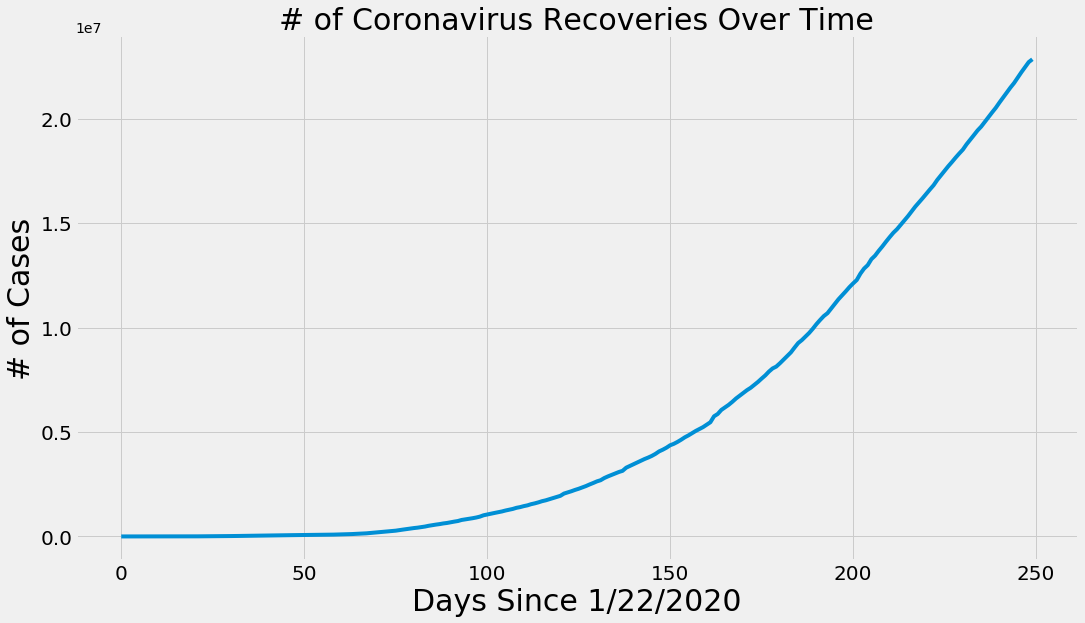

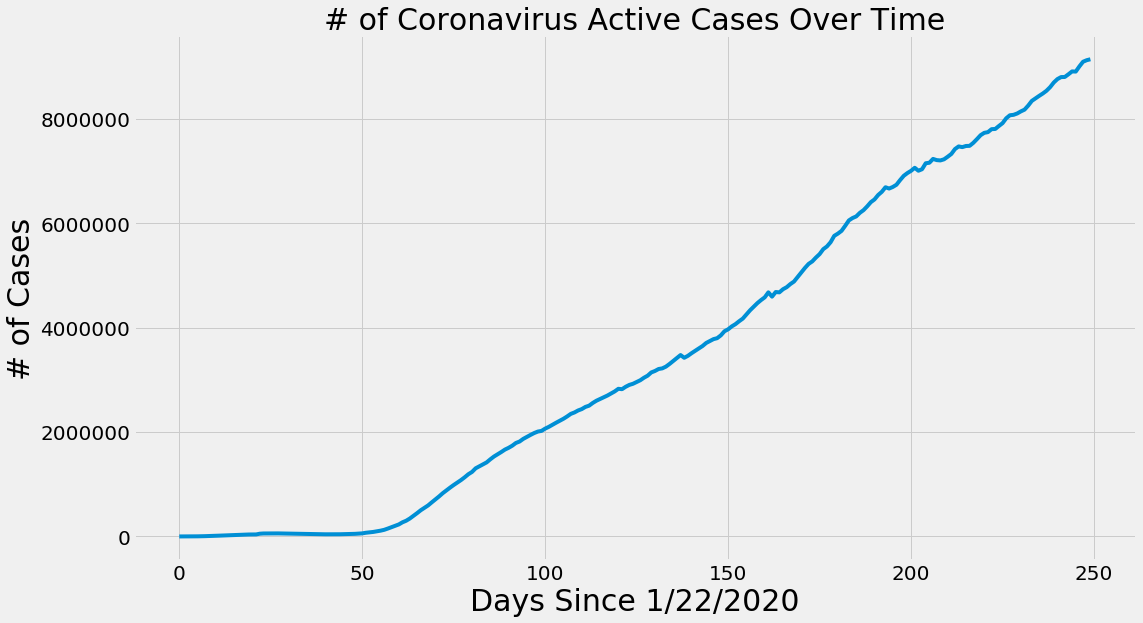

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [21]:
# Calculate the number of daily increase in total cases, total deaths, total recovered, and total active by time 
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(total_cases)

# deaths
world_daily_death = daily_increase(total_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)

# active
world_daily_active = [world_daily_increase[i] - world_daily_death[i] - world_daily_recovery[i]
                        for i in range(len(world_daily_increase))]

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

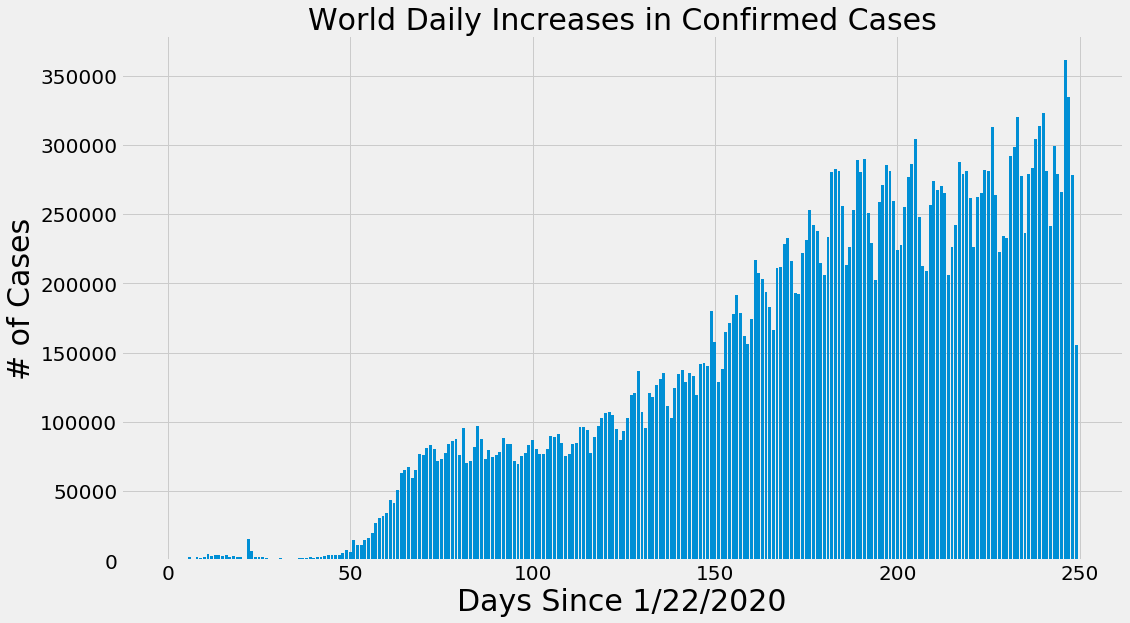

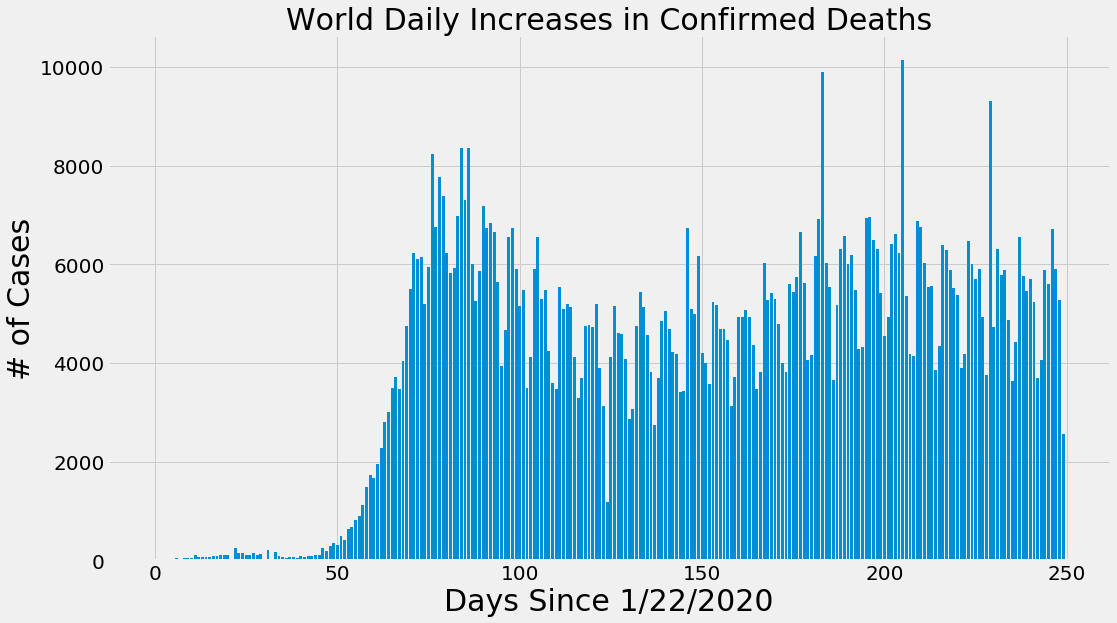

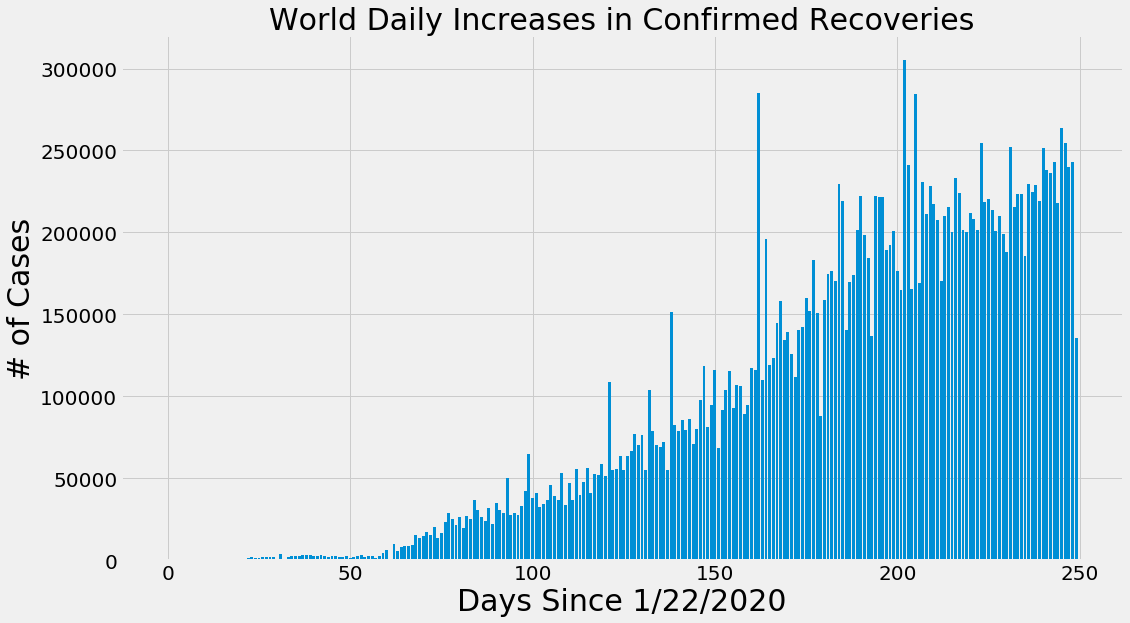

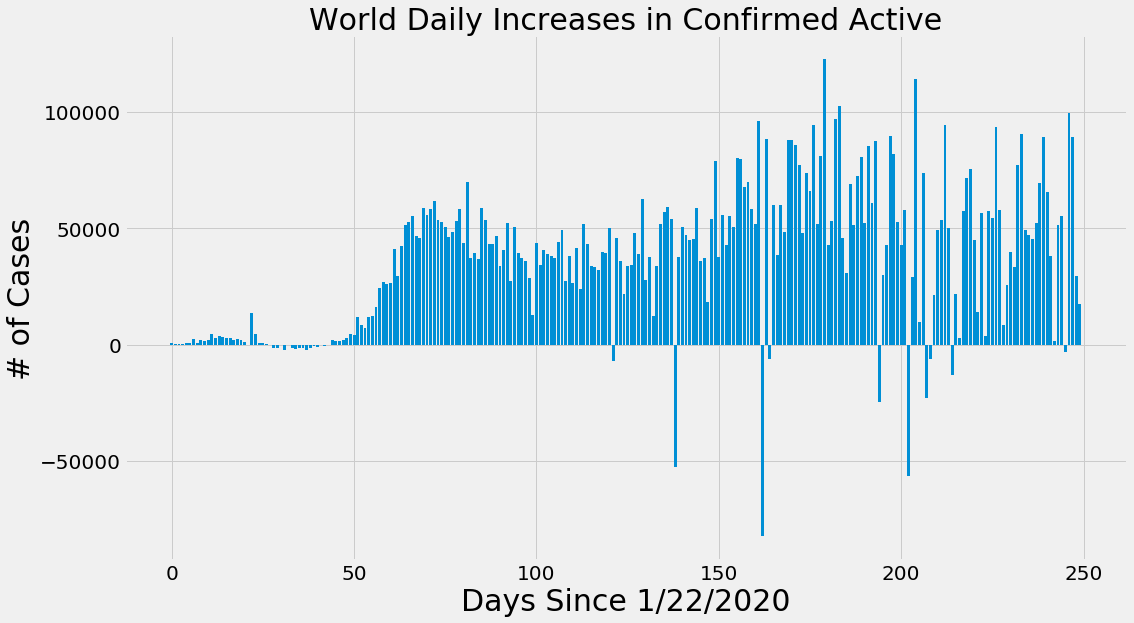

In [25]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_active)
plt.title('World Daily Increases in Confirmed Active', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [26]:
# The global mortality and recovered rate in percentage by time.
mortality_rate = [i*100 for i in mortality_rate]
recovery_rate = [i*100 for i in recovery_rate]

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

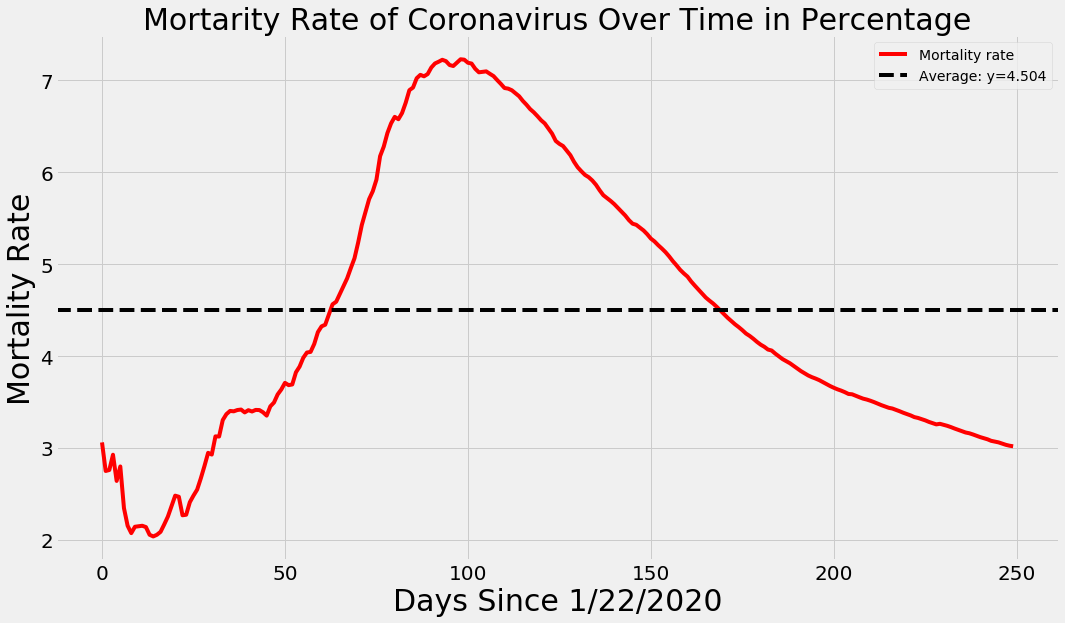

In [35]:
# Get the average mortality rate of all the time
mean_mortality_rate = np.mean(mortality_rate)
# Visualize the mortality rate in by time (day units) using the line chart.
#
# Using the dashline to visualize the average mortality rate.
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='red', label='Mortality rate')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black', label='Average: y='+str(round(mean_mortality_rate, 3)))
plt.title('Mortarity Rate of Coronavirus Over Time in Percentage', size=30)
plt.legend(prop={'size': 30})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.legend()

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

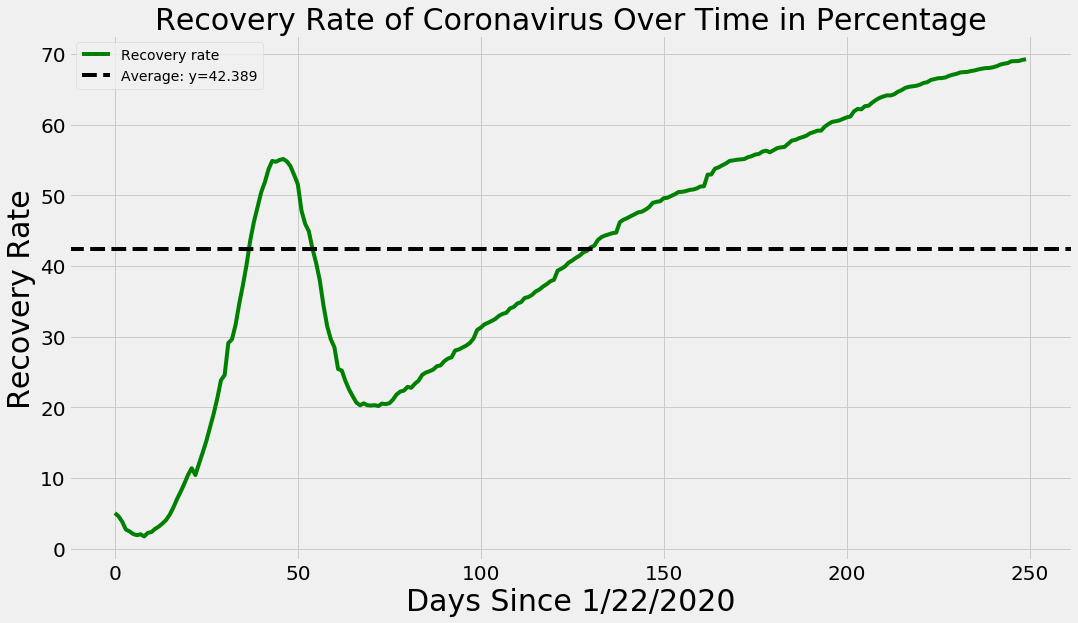

In [34]:
# Get the average mortality rate of all the time
mean_recovery_rate = np.mean(recovery_rate)
# Visualize the mortality rate in by time (day units) using the line chart.
#
# Using the dashline to visualize the average mortality rate.
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='green', label='Recovery rate')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black', label='Average: y='+str(round(mean_recovery_rate, 3)))
plt.title('Recovery Rate of Coronavirus Over Time in Percentage', size=30)
plt.legend(prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.legend()

#  5. Continent Analysis

## Data Prerocessing

In [15]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [38]:
confirmed_df.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
recoveries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries2[:]])
confirmed_df.head()

NameError: name 'countries' is not defined

In [17]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/18/20  9/19/20  9/20/20  \
0        0        0        0        0  ...    38883    38919    39044   
1        0        0        0        0  ...    12073    12226    12385   
2        0        0        0        0  ...    49413    49623    49826   
3        0        0        0        0  ...     1564     1564     1564   
4        0        0        0        0  ...     3848     3901     3991   

   9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  9/26/20  continent  
0    39074    39096    39145    39170    39186    39192       Asia  
1    12535    12666    12787    12921    13045    13153     Europe  
2    50023    50214    50400    50579    50754    50914     Africa  
3     1681     1681     1753     1753     1836     1836     Europe  
4     4117     4236     4363     4475     4590     4672     Africa  

[5 rows x 254 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Confirmed: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [18]:
#columns for contries_df data frame
continent = []
Confirmed = list(confirmed_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Deaths = list(deaths_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Recoveries = list(recoveries_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Active = []
Mortality_rate = []

countries = sorted(list(set(confirmed_df['Country/Region'])))
countries_df = pd.DataFrame()
countries_df['Country/Region'] = countries
countries_df['Lat'] = confirmed_df['Lat']
countries_df['Long'] = confirmed_df['Long']
countries_df['continent'] = confirmed_df['continent']
countries_df['Confirmed'] = Confirmed
countries_df['Deaths'] = Deaths
countries_df['Recoveries'] = Recoveries
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Deaths'] + countries_df['Recoveries'])
countries_df['Mortality Rate'] = (countries_df['Deaths'] / countries_df['Confirmed'])*100.00

countries_df = countries_df.set_index('Country/Region')
countries_df

Lat       Long continent  Confirmed  Deaths  \
Country/Region                                                          
Afghanistan         33.939110  67.709953      Asia      39192    1453   
Albania             41.153300  20.168300    Europe      13153     375   
Algeria             28.033900   1.659600    Africa      50914    1711   
Andorra             42.506300   1.521800    Europe       1836      53   
Angola             -11.202700  17.873900    Africa       4672     171   
...                       ...        ...       ...        ...     ...   
West Bank and Gaza -18.665695  35.529562    Africa      38253     285   
Western Sahara     -22.957600  18.490400    Africa         10       1   
Yemen               28.166700  84.250000      Asia       2030     587   
Zambia              12.521100 -69.968300    Europe      14612     332   
Zimbabwe            12.178400 -68.238500    Europe       7803     227   

                    Recoveries  Active  Mortality Rate  
Country/Region                                          
Afghanistan              32635    5104        3.707389  
Albania                   7397    5381        2.851061  
Algeria                  35756   13447        3.360569  
Andorra                   1263     520        2.886710  
Angola                    1639    2862        3.660103  
...                        ...     ...             ...  
West Bank and Gaza       27704   10264        0.745040  
Western Sahara               8       1       10.000000  
Yemen                     1260     183       28.916256  
Zambia                   13727     553        2.272105  
Zimbabwe                  6067    1509        2.909138  

[188 rows x 8 columns]


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [19]:
#columns for contries_df data frame
continent = []
Confirmed = list(confirmed_df.groupby('continent').sum().loc[:, cols[-1]])
Deaths = list(deaths_df.groupby('continent').sum().loc[:, cols[-1]])
Recoveries = list(recoveries_df.groupby('continent').sum().loc[:, cols[-1]])
Active = []
Mortality_rate = []

continent = sorted(list(set(confirmed_df['continent'])))
continent_df = pd.DataFrame()
continent_df['continent'] = continent
continent_df['Confirmed'] = Confirmed
continent_df['Deaths'] = Deaths
continent_df['Recoveries'] = Recoveries
continent_df['Active'] = continent_df['Confirmed'] - (continent_df['Deaths'] + continent_df['Recoveries'])
continent_df['Mortality Rate'] = (continent_df['Deaths'] / continent_df['Confirmed'])*100.00

continent_df = continent_df.set_index('continent')
continent_df

Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa           1451954   35028     1201520   215406        2.412473
Asia            10136516  187329     8442037  1507150        1.848061
Australia          29437     906       26864     1667        3.077759
Europe           4816839  219920     2376218  2220701        4.565650
North America    8479504  302394     3843453  4333657        3.566176
Others             61697     987       39871    20839        1.599754
South America    7864065  247579     6785417   831069        3.148232

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [20]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats): 
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

KeyError: 'continent'

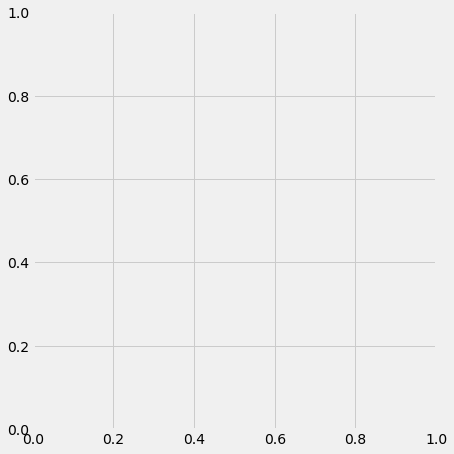

In [31]:
# data
confirmed_by_continent = continent_df['Confirmed']
deaths_by_continent = continent_df['Deaths']
continents = continent_df.index

# show plot 
visualize_covid_cases(confirmed_by_continent, deaths_by_continent, continents.all())


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

# Problem 12
    Visualize the covariance matrix for continents_df.

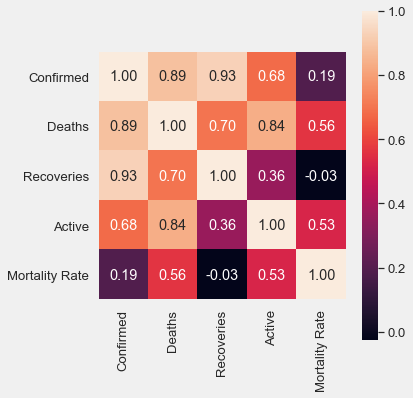

In [23]:
cols = continent_df.columns
covariance = continent_df.corr()

plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
hm = sns.heatmap(covariance,
                 cbar=True,
               
                 annot=True,
                 square=True,
                 fmt='.2f',
                )
hm.set_xticklabels(cols , rotation=90 ) ;

plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

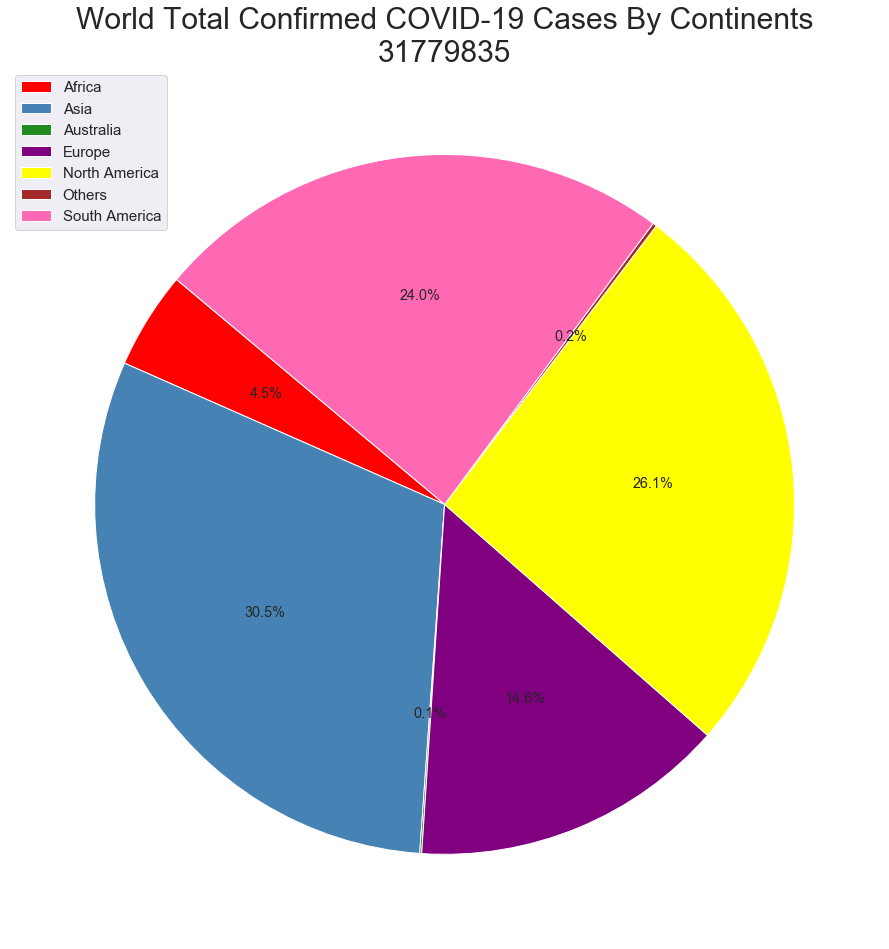

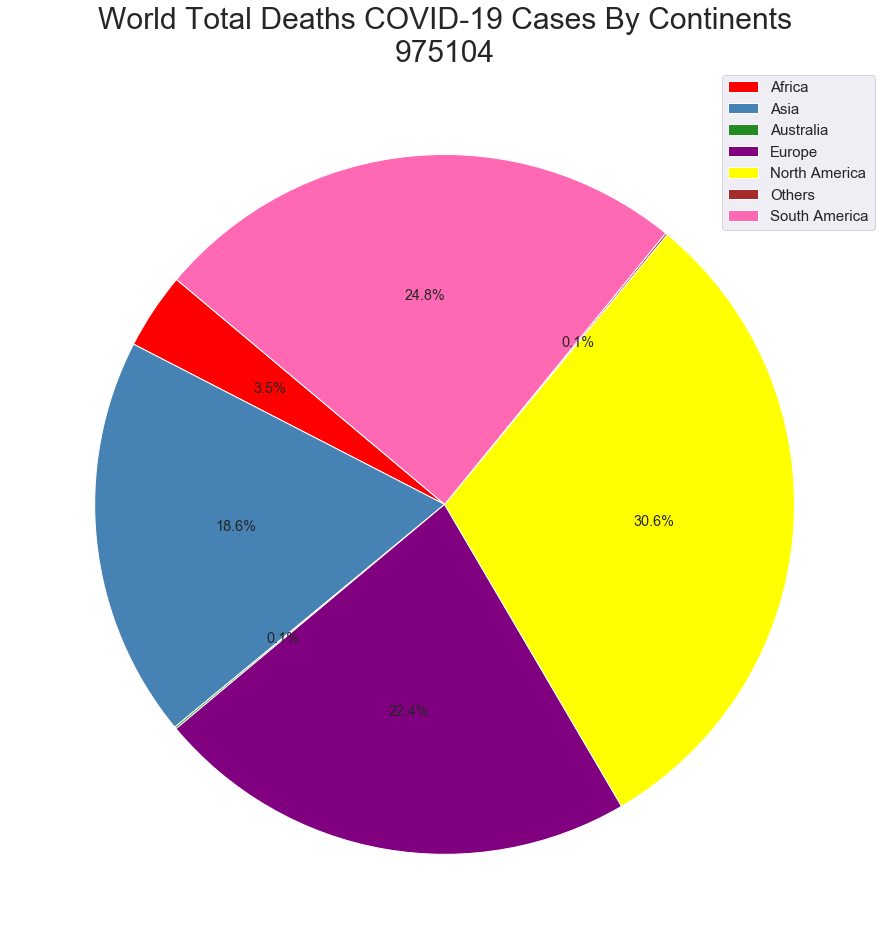

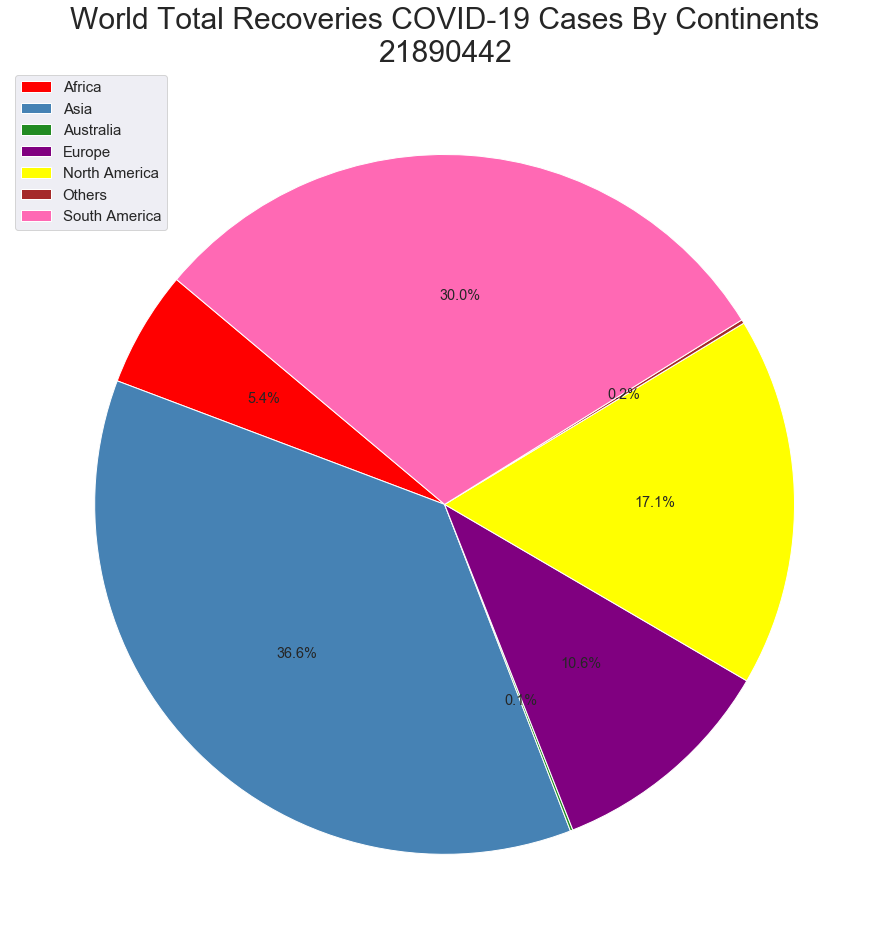

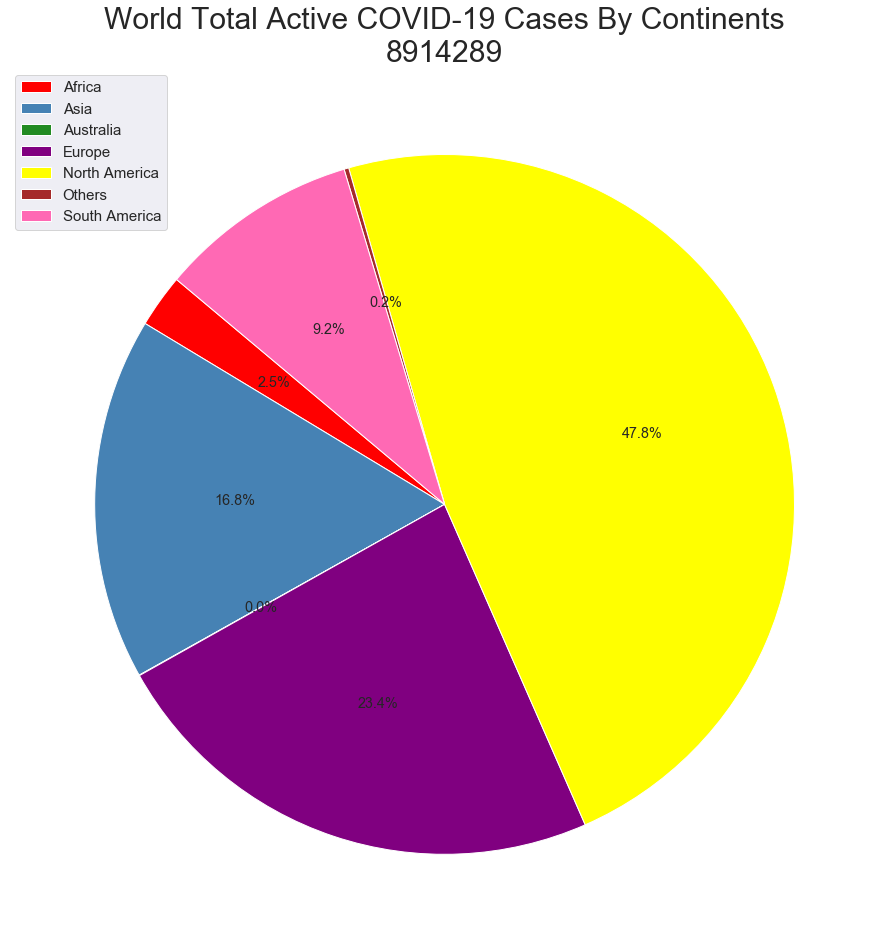

In [24]:
#get the number of confirmed, deaths, recoveries, and active of the 7 continents.
confirmed_by_continent = continent_df['Confirmed']
deaths_by_continent = continent_df['Deaths']
recoveries_by_continent = continent_df['Recoveries']
active_by_continent = continent_df['Active']

#set up for pie chart
colors = ['red', '#4682b4', '#228b22', '#800080', '#ffff00', '#a52a2a', '#ff69b4']
labels = continent_df.index
title1 = 'World Total Confirmed COVID-19 Cases By Continents\n' + str(sum(confirmed_by_continent)) #total of confirmed cases
title2 = 'World Total Deaths COVID-19 Cases By Continents\n' + str(sum(deaths_by_continent))
title3 = 'World Total Recoveries COVID-19 Cases By Continents\n' + str(sum(recoveries_by_continent))
title4 = 'World Total Active COVID-19 Cases By Continents\n' + str(sum(active_by_continent))

#plot confirmed cases in pie chart
plt.figure(1, figsize=(15,15))
plt.pie(confirmed_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title1, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot deaths cases in pie chart
plt.figure(2, figsize=(15,15))
plt.pie(deaths_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title2, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot recoveries cases in pie chart
plt.figure(3, figsize=(15,15))
plt.pie(recoveries_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title3, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot active cases in pie chart
plt.figure(4, figsize=(15,15))
plt.pie(active_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title4, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)
plt.show()



# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [27]:
m2=folium.Map()

states = folium.map.FeatureGroup()
for lat, long, in zip(confirmed_df['Lat'], confirmed_df['Long']):
    confirmed_cases = confirmed_df.loc[confirmed_df['Lat'] == lat, confirmed_df.columns[-2]].iloc[0]
    deaths_cases = deaths_df.loc[confirmed_df['Lat'] == lat, deaths_df.columns[-2]].iloc[0]
    #recovery_cases = recoveries_df.loc[confirmed_df['Lat'] == lat, recoveries_df.columns[-2]].iloc[0]
    country = confirmed_df.loc[confirmed_df['Lat'] == lat, confirmed_df.columns[1]].iloc[0]
    
    
    title_html = '''
             <h3 align="center" style="font-size:16px">{0}</h3>
             <br><b>
            Confirmed: {1}
            <br>
            Deaths: {2}
             </b>
             '''.format(country, confirmed_cases, deaths_cases)
    if confirmed_cases/1000000 < 0.01:
        radius = confirmed_cases/200
    else:
        radius = confirmed_cases/70000
    title = country + '\n' + str(confirmed_cases) +'\n' + str(deaths_cases)+'\n' #+ str(recovered_cases)
    states.add_child(folium.CircleMarker(
                                    [lat, long],
                                    radius=radius, # define how big you want the circle markers to be
                                    color='orange',
                                    popup=title_html,
                                    fill=True,
                                    fill_color='orange',
                                    fill_opacity=0.3,))

m2.add_child(states)

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [89]:
#get columns_name
confirmed_df_columns = confirmed_df.columns[4:]
#get the numbers of confirmed, deaths and recoveries group by 'Country/Region'
c_gr = confirmed_df.groupby('Country/Region').sum()
d_gr = deaths_df.groupby('Country/Region').sum()
r_gr = recoveries_df.groupby('Country/Region').sum()

#create a dataframe build with 3 columns, Lat, Long and the number of active cases recently
active_cases_df = pd.DataFrame()
lastest_active_cases = c_gr.loc[:, confirmed_df_columns[-2]]- d_gr.loc[:, confirmed_df_columns[-2]] - r_gr.loc[:, confirmed_df_columns[-2]]

log10_lastest_active_cases = []
for i in lastest_active_cases.values:
    if i == 0:
        log10_lastest_active_cases.append(0)
    else:
        log10_lastest_active_cases.append(math.log10(i))

active_cases_df['Lat'] = c_gr['Lat']
active_cases_df['Long'] = c_gr['Long']

active_cases_df['log(10) Active Cases'] = log10_lastest_active_cases
active_cases_df

Lat       Long  log(10) Active Cases
Country/Region                                                
Afghanistan         33.939110  67.709953              3.706632
Albania             41.153300  20.168300              3.722469
Algeria             28.033900   1.659600              4.123002
Andorra             42.506300   1.521800              2.696356
Angola             -11.202700  17.873900              3.436322
...                       ...        ...                   ...
West Bank and Gaza  31.952200  35.233200              4.022140
Western Sahara      24.215500 -12.885800              0.000000
Yemen               15.552727  48.516388              2.296665
Zambia             -13.133897  27.849332              2.683047
Zimbabwe           -19.015438  29.154857              3.173478

[188 rows x 3 columns]

In [90]:
#use plotly.express to plot
fig = px.scatter_mapbox(active_cases_df, lat="Lat", lon="Long", color="log(10) Active Cases", size="log(10) Active Cases",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()


# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [36]:
top_10_countries_by_confirmed_case = countries_df.sort_values('Confirmed',ascending=False).head(10)
top_10_countries_by_confirmed_case.head(10)

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             35.937500   14.375400         Europe    6300622  189208   
India           35.745200   95.995600           Asia    4280422   72775   
Brazil          50.833300    4.469936         Europe    4147794  126960   
Russia          41.902900   12.453400         Others    1027334   17818   
Peru            39.074200   21.824300         Europe     689977   29838   
Colombia        11.550000  104.916700           Asia     666521   21412   
South Africa    35.907757  127.766922           Asia     639362   15004   
Mexico          58.595300   25.013600         Europe     637509   67781   
Spain           41.204380   74.766098           Asia     525549   29516   
Argentina      -38.416100  -63.616700  South America     488007   10129   

                Recoveries   Active  Mortality Rate  
Country/Region                                       
USA                2333551  3777863        3.003005  
India              3323950   883697        1.700183  
Brazil             3549201   471633        3.060904  
Russia              840997   168519        1.734392  
Peru                522251   137888        4.324492  
Colombia            518229   126880        3.212502  
South Africa        566555    57803        2.346714  
Mexico              531334    38394       10.632164  
Spain               150376   345657        5.616222  
Argentina           357388   120490        2.075585

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

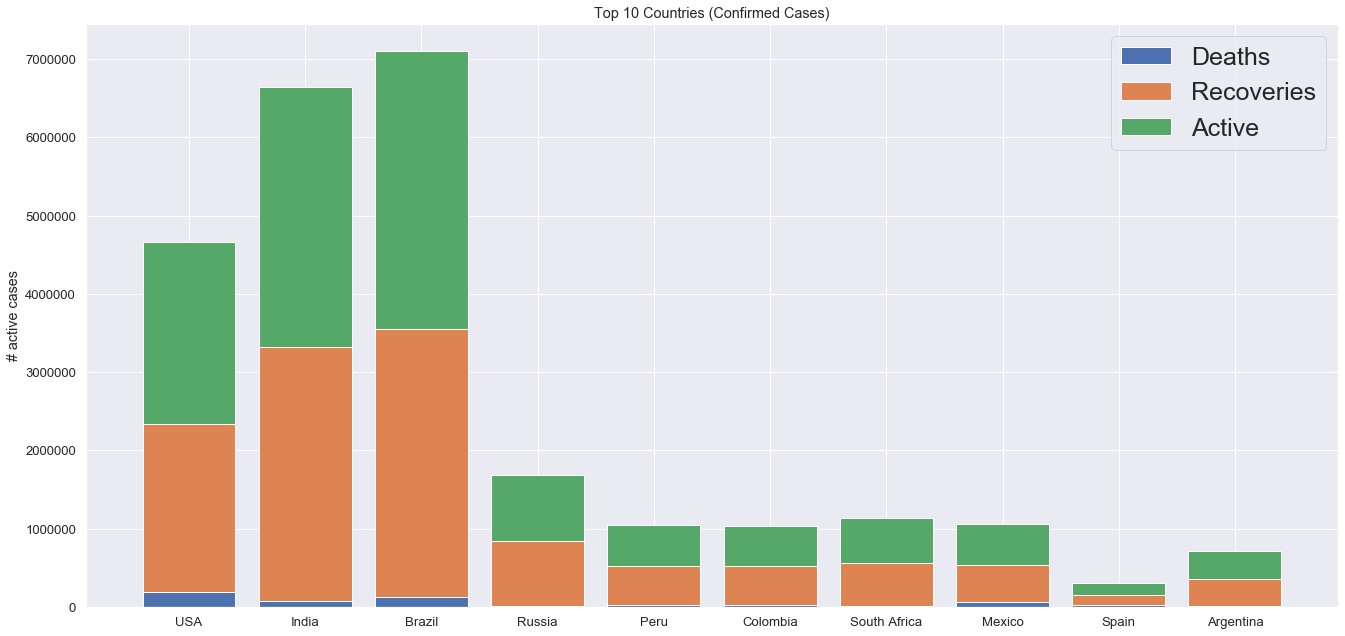

In [37]:
### top 10 confirmed countries with number active, recoveries and deaths cases
top_10_countries_by_deaths_case = top_10_countries_by_confirmed_case['Deaths']
top_10_countries_by_recoveries_case = top_10_countries_by_confirmed_case['Recoveries']
top_10_countries_by_active_case = top_10_countries_by_confirmed_case['Active']
#get countries name for bar chart
labels = top_10_countries_by_active_case.index

plt.figure(1, figsize=(20,10))
plt.bar(labels, top_10_countries_by_deaths_case, label='Deaths')
plt.bar(labels, top_10_countries_by_recoveries_case, bottom=top_10_countries_by_deaths_case,
       label='Recoveries')
plt.bar(labels, top_10_countries_by_recoveries_case, bottom=top_10_countries_by_recoveries_case,
       label='Active')

plt.ylabel('# active cases')
plt.title('Top 10 Countries (Confirmed Cases)')
plt.legend(loc='best', prop={'size': 25})

plt.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    My answer: Yes, they do.

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [39]:
#19.1
#continent has the highest death rate over continents' active cases
continent_has_highest_death_rate = continent_df.sort_values('Mortality Rate', ascending=False).head(1)
print('Continent has the highest death rate over continents:', continent_has_highest_death_rate.index[0])

#19.2
#continent has the highest rate on COVID 2019 spread rate over continents' active cases?
confirmed_cases_group_by_continent = confirmed_df.groupby('continent').sum()
confirmed_by_date = confirmed_cases_group_by_continent.loc[:,cols[4:]]
confirmed_last_10_days = []

for i in confirmed_by_date.index:
    continent_cols = confirmed_by_date.columns
    continent_cols = continent_cols[-11:]
    confirmed_date = []
    for j in range(len(continent_cols)):
        if j == 0:
            pass
        else:
            confirmed_date.append(
                confirmed_by_date.loc[i,continent_cols[j]] -
                                      confirmed_by_date.loc[i,continent_cols[j-1]])
    confirmed_date = confirmed_date[1:]
    confirmed_last_10_days.append(sum(confirmed_date))

#get active cases in 
active_cases_before = daily_increases_total_active[-10]
Spread_rate = [i/active_cases_before for i in confirmed_last_10_days ]
continent_df['Spead Rate'] = Spread_rate
continent_has_highest_spead_rate = continent_df.sort_values('Spead Rate', ascending=False).head(1)
print('Continent has the highest spead rate over continents:', continent_has_highest_death_rate.index[0])

#19.3
#continent has the highest rate on COVID 2019 recoveries rate over continents' dataset

#calculate recoveries rate by recoveries cases devide for confirmed cases
recoveries_rate = [(continent_df['Recoveries'][i]/continent_df['Confirmed'][i]*100) for i in range(len(continent_df))]

#add new column 'recoveries rate' to continent_df
continent_df['Recoveries Rate'] = recoveries_rate

#get continent has hightest recoveries rate
continent_has_highest_recoveries_rate = continent_df.sort_values('Recoveries Rate', ascending=False).head(1)
print('Continent has the highest recoveries rate over continents:', continent_has_highest_recoveries_rate.index[0])


Continent has the highest death rate over continents: Europe
Continent has the highest spead rate over continents: Europe
Continent has the highest recoveries rate over continents: Australia


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [40]:
#country has the highest death rate over countries' dataset
country_has_the_highest_deah_rate = countries_df.sort_values('Mortality Rate', ascending=False).head(1)
print("The country has the highest death rate over countries' dataset:", country_has_the_highest_deah_rate.index[0])

#country has the highest rate on COVID 2019 spread rate over countries'dataset
confirmed_cases_group_by_countries = confirmed_df.groupby('Country/Region').sum()
confirmed_by_date_by_countries = confirmed_cases_group_by_countries.loc[:,cols[4:]]
confirmed_last_10_days_by_countries = []

for i in confirmed_by_date_by_countries.index:
    countries_cols = confirmed_by_date_by_countries.columns
    countries_cols = countries_cols[-11:]
    confirmed_date = []
    for j in range(len(continent_cols)):
        if j == 0:
            pass
        else:
            confirmed_date.append(
                confirmed_by_date_by_countries.loc[i,continent_cols[j]] -
                                      confirmed_by_date_by_countries.loc[i,continent_cols[j-1]])
    confirmed_date = confirmed_date[1:]
    confirmed_last_10_days_by_countries.append(sum(confirmed_date))
confirmed_last_10_days_by_countries

active_cases_before = daily_increases_total_active[-10]
Spread_rate_by_countries = [i / active_cases_before for i in confirmed_last_10_days_by_countries]
countries_df['Spead Rate'] = Spread_rate_by_countries

country_has_the_highest_spead_rate = countries_df.sort_values('Spead Rate', ascending=False).head(1)
print("The country has the highest rate on COVID 2019 spread rate over countries'dataset:",
      country_has_the_highest_spead_rate.index[0])


#20.3
#continent has the highest rate on COVID 2019 recoveries rate over continents' dataset

#calculate recoveries rate by recoveries cases devide for confirmed cases
recoveries_rate_by_countries = [(countries_df['Recoveries'][i]/countries_df['Confirmed'][i]*100)
                                for i in range(len(countries_df))]

#add new column 'recoveries rate' to continent_df
countries_df['Recoveries Rate'] = recoveries_rate_by_countries

#get continent has hightest recoveries rate
country_has_highest_recoveries_rate = countries_df.sort_values('Recoveries Rate', ascending=False).head(1)
print('Continent has the highest recoveries rate over continents:', country_has_highest_recoveries_rate.index[0])



The country has the highest death rate over countries' dataset: Yemen
The country has the highest rate on COVID 2019 spread rate over countries'dataset: India
Continent has the highest recoveries rate over continents: Saint Vincent and the Grenadines


# Problem 21
**USA dataset**

In [115]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
us_medical_data


Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
2             American Samoa             US  2020-07-07 04:34:13 -14.2710   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
5                 California             US  2020-07-07 04:34:13  36.1162   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
9           Diamond Princess             US  2020-07-07 04:34:13      NaN   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
11                   Florida             US  2020-07-07 04:34:13  27.7663   
12                   Georgia             US  2020-07-07 04:34:13  33.0406   
13            Grand Princess             US  2020-07-07 04:34:13      NaN   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
36                  New York             US  2020-07-07 04:34:13  42.1657   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
44               Puerto Rico             US  2020-07-07 04:34:13  18.2208   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
51        

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [6]:
# 21.1
# The state has the highest death rate over states' dataset
state_has_the_highest_death_rate = us_medical_data.sort_values('Mortality_Rate', ascending=False).head(1)

print("21.1\tThe state has the highest death rate over states' dataset:", (state_has_the_highest_death_rate.values[0][0]))

# 21.2
# The state has the highest rate on COVID 2019 spread rate over states' dataset
######
# get current day in us_medical_data dataset
current_day_str = us_medical_data['Last_Update'][0]
# convert string into datetime format
current_day = datetime.strptime(current_day_str, '%Y-%d-%m %H:%M:%S')
# convert datetime into timestamp
current_day_timestamp_ = current_day.timestamp()

# get timestamp of last 10 days
timestamp_last_10_days = current_day_timestamp_ - (60*60*24*10)
# convert timestamp into datetime
datetime_last_10_days = datetime.fromtimestamp(timestamp_last_10_days).strftime('%m-%d-%Y')
    
# update path to get data of last 10 days
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+ str(datetime_last_10_days) +'.csv'
us_medical_data_last_10_days = pd.read_csv(path)

# get new confirmed case in last 10 days from the date in dataset
new_confirmed_in_last_10_days = us_medical_data['Confirmed'] - us_medical_data_last_10_days['Confirmed']
# active cases in last 10 days
number_of_active_last_10_days = us_medical_data_last_10_days['Active']

# calculate spead_rate
spread_rate = new_confirmed_in_last_10_days / number_of_active_last_10_days
# add Spead_rate field to us_medical_data dataset
us_medical_data['Spead_rate'] = spread_rate

state_has_the_highest_spead_rate = us_medical_data.sort_values('Spead_rate', ascending=False).head(1)
print("21.3\tThe state has the highest spead rate over states' dataset:", (state_has_the_highest_spead_rate.values[0][0]))

# 21.3
# The state has the highest recoveries rate over states' dataset?
us_medical_data['Recovery_rate'] = us_medical_data['Recovered']/us_medical_data['Confirmed']
state_has_the_highest_recovery_rate = us_medical_data.sort_values('Recovery_rate', ascending=False).head(1)

print("21.3\tThe state has the highest death rate over states' dataset:", (state_has_the_highest_recovery_rate.values[0][0]))



21.1	The state has the highest death rate over states' dataset: Connecticut
21.3	The state has the highest spead rate over states' dataset: Virgin Islands
21.3	The state has the highest death rate over states' dataset: Minnesota


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

# Model 1: Prophet

In [5]:
from fbprophet import Prophet

In [118]:
########################
# start_date variable depend on the date which you set it start from
start_date = '04-23-2020'
########################

# get top 10 states with highest confirmed cases
top10_state_confirmed = us_medical_data.sort_values('Confirmed', ascending=False).head(10)
# get index
index_the_highest_confirmed = top10_state_confirmed.index
# get states
states = top10_state_confirmed['Province_State']

# create a data frame
top10_us_confirmed_data_frame = pd.DataFrame({'Province_State': states})

# this code to calculate number_dates from start_date
now = datetime.now()
time_stamp_start_date = datetime.strptime(start_date, '%m-%d-%Y').timestamp()
time_stamp_now = now.timestamp()
number_dates = (time_stamp_now - time_stamp_start_date)/(60*24*60)


for i in range(int(number_dates)):
    try:
        time_stamp_start_date += 60*60*24
        date_from_start_day = datetime.fromtimestamp(time_stamp_start_date).strftime('%m-%d-%Y')
        path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+ str(date_from_start_day) +'.csv'
        df = pd.read_csv(path)

        data = [df['Confirmed'][index] for index in index_the_highest_confirmed]
        top10_us_confirmed_data_frame[date_from_start_day] = data
    except:
        break
    

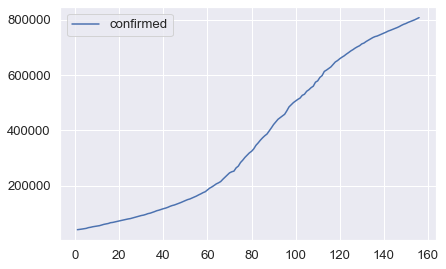

In [120]:
# Time-series with Prophet
# take 1 data point
data_1 = top10_us_confirmed_data_frame.iloc[1]
df = pd.DataFrame({'date':data_1.index, 'confirmed': data_1.values})

# remove header row
df = df[1:]

df.plot()
plt.show()

In [121]:
# prepare expected columns name 
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

# create Prophet model
model = Prophet()

# fit the model
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds           yhat     yhat_lower     yhat_upper
0 2020-09-28  817117.117888  814493.733216  819912.184504
1 2020-09-29  821627.300671  818914.397207  824405.824209
2 2020-09-30  826059.214838  822814.544276  828970.275392
3 2020-10-01  830019.165494  826538.663751  833122.474097
4 2020-10-02  833986.915353  830349.260946  837840.785782


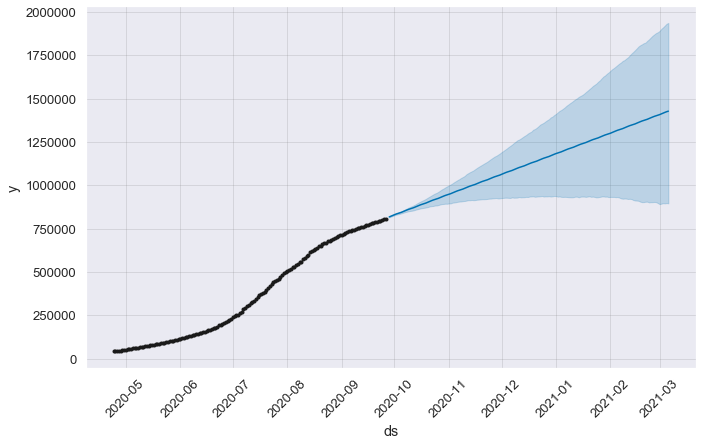

In [122]:
# define the period which we want to predict
future = list()
for i in range(1, len(df)+5):
    time_stamp_start_date += 60*60*24
    date_from_start_day = datetime.fromtimestamp(time_stamp_start_date).strftime('%Y-%m-%d')
    future.append([date_from_start_day])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'], errors='coerce')

# use model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
plt.xticks(rotation=45)

plt.show()

# Model 2: Regression

In [126]:
from sklearn.metrics import mean_squared_error, r2_score


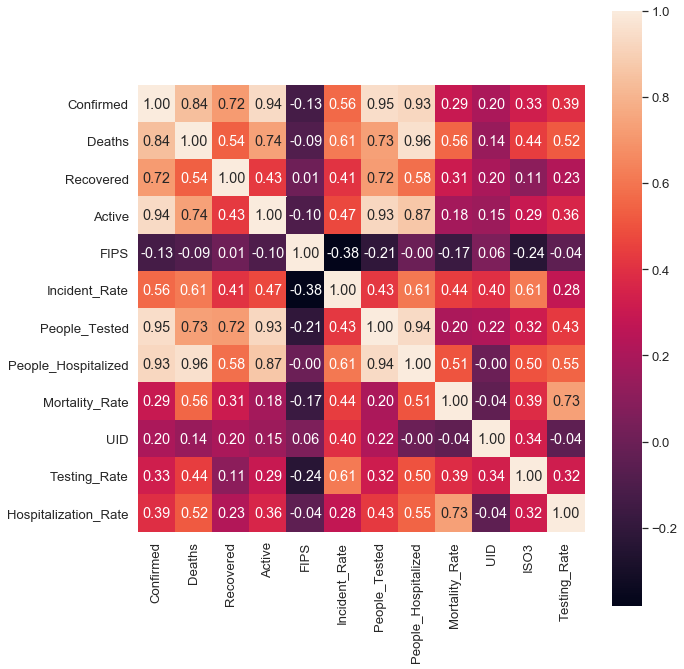

In [56]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
cols = us_medical_data.columns
new_us_df = us_medical_data.loc[:, cols[5:]]
# drop categorical column
#new_us_df = new_us_df.drop(['ISO3'], axis=1)
new_us_df

# update cols_variable 
cols = new_us_df.columns
covariance = new_us_df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
hm = sns.heatmap(covariance,
                 cbar=True,
               
                 annot=True,
                 square=True,
                 fmt='.2f',
                )
hm.set_xticklabels(cols , rotation=90 ) ;

plt.tight_layout()
plt.show()

In [66]:
# From the correlation heatmap above
# I decided to choose 'People tested to predict'
# Use some variable we defined above


# get top 10 states with highest confirmed cases
top10_state_has_people_tested = us_medical_data.sort_values('People_Tested', ascending=False).head(10)
# get index
index_the_highest_tested = top10_state_has_people_tested.index

# create a data frame
top10_us_tested_data_frame = pd.DataFrame({'Province_State': states})
time_stamp_start_date = datetime.strptime(start_date, '%m-%d-%Y').timestamp()
time_stamp_now = now.timestamp()
number_dates = (time_stamp_now - time_stamp_start_date)/(60*24*60)

for i in range(int(number_dates)):
    try:
        time_stamp_start_date += 60*60*24
        date_from_start_day = datetime.fromtimestamp(time_stamp_start_date).strftime('%m-%d-%Y')
        path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+ str(date_from_start_day) +'.csv'
        df = pd.read_csv(path)

        data = [df['People_Tested'][index] for index in index_the_highest_tested]
        top10_us_tested_data_frame[date_from_start_day] = data
    except:
        break
    

In [125]:
# create data frame for 2 axis
confirmed_data = top10_us_confirmed_data_frame.iloc[1]
tested_data = top10_us_tested_data_frame.iloc[1]
df_2 = pd.DataFrame({'tested':tested_data.values[1:], 'confirmed': confirmed_data.values[1:]})

# use model to make predict
model2 = LinearRegression()

x = df_2['tested'].values.reshape(-1,1)
y = df_2['confirmed']

model2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [0.0904617]
Mean squared error: 1370469126.77
Coefficient of determination: 0.98


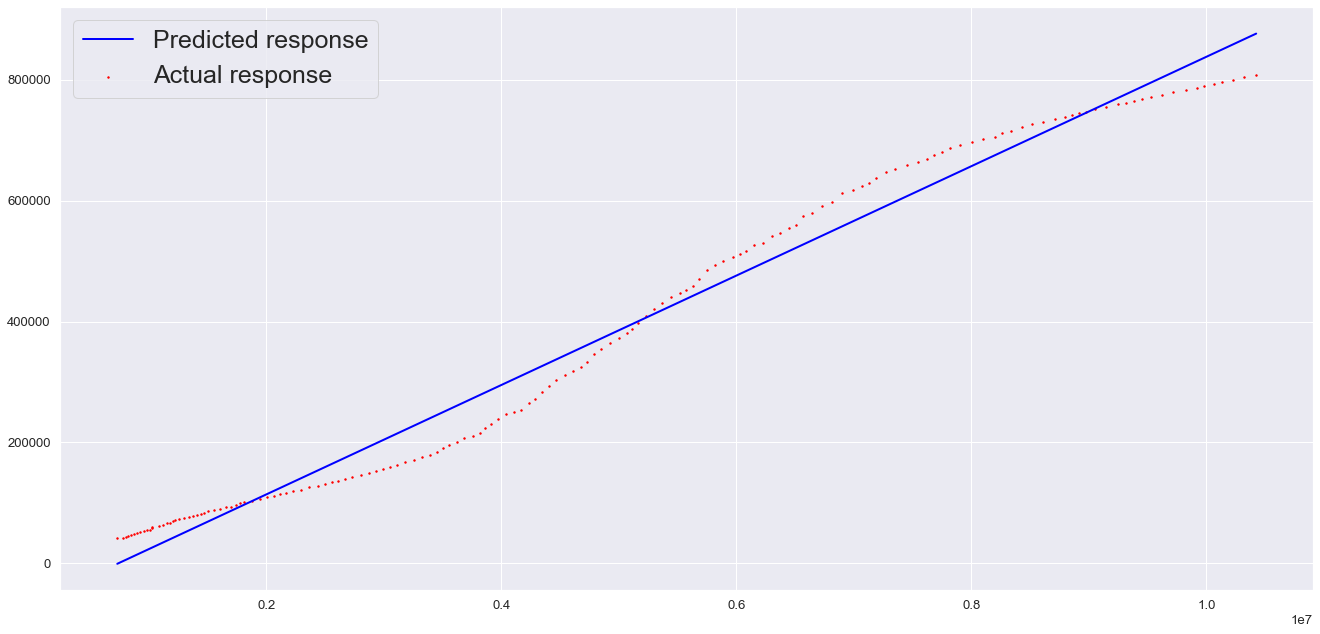

In [151]:
y_pred = model2.predict(x)

# The coefficients
print('Coefficients: \n', model2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_2['confirmed'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(x, y,  color='red', s=2, label='Actual response')
plt.plot(x, y_pred, color='blue', linewidth=2, label='Predicted response')

plt.legend(loc=2, prop={'size': 25})
plt.show()
